In [1]:
%%time
from src.data.make_dataset import load_list, get_stock_data
from src.models.StockModel import StockModel
window_size = 20
start_date = '2017-01-01'
end_date = '2024-08-25'
feature_columns = ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
target = "Open"

# Load symbols
indexes_symbols = load_list("indexes")
nasdaq_symbols = load_list("NASDAQ")
sp500_symbols = load_list("SP500")

# Test tickers, sp500 symbols not also in nasdaq
test_tickers = [item for item in sp500_symbols if item not in nasdaq_symbols]
test_tickers = test_tickers[:25]

#tickers = ['^GSPC', '^IXIC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'AVGO', 'META', 'GOOGL', 'GOOG', 'MMM', 'ADBE', 'BWA', 'GD', 'IT']
#tickers = ['^GSPC', '^IXIC']
train_tickers = indexes_symbols + nasdaq_symbols
train_tickers = train_tickers[:50]

# Download data
combined_data = get_stock_data(train_tickers, "1d", start_date, end_date)
combined_data.info()
# Test data
test_data = get_stock_data(test_tickers, "1d", start_date, end_date)

# Create and train model
stock_model = StockModel(window_size=window_size, feature_columns=feature_columns, target_name=target, export=True)

stock_model.train(combined_data, patience=10, epochs=150, graph=False)
metrics_dict, mean_metrics = stock_model.evaluate_many(test_data, graph=False)
print(metrics_dict)
print(mean_metrics)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92580 entries, 2017-01-03 00:00:00-05:00 to 2024-08-23 00:00:00-04:00
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          92580 non-null  float64
 1   High          92580 non-null  float64
 2   Low           92580 non-null  float64
 3   Close         92580 non-null  float64
 4   Volume        92580 non-null  int64  
 5   Dividends     92580 non-null  float64
 6   Stock Splits  92580 non-null  float64
 7   Ticker        92580 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 6.4+ MB
Initializing model:
 - Window size: 20
 - Features: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
 - Target: Open
--- Preparing ^GSPC data using 20 window---
Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 2.23739990e+03  2.26160010e+03  1.29653000e+09  3.79003906e+00
 -2.02429932e+02  4.00986

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 512)             │       1,062,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 512)                 │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,162,625 (12.06 MB)

 Trainable params: 3,162,625 (12.06 MB)

 Non-trainable params: 0 (0.00 B)

--- 1/50 Training model for ^GSPC ---
Epoch 1/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - loss: 0.0291 - mape: 199.1010 - val_loss: 0.0154 - val_mape: 12.7138
Epoch 2/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 0.0151 - mape: 197.7255 - val_loss: 0.0129 - val_mape: 11.3103
Epoch 3/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 0.0182 - mape: 217.0779 - val_loss: 0.0085 - val_mape: 9.1297
Epoch 4/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0235 - mape: 250.8528 - val_loss: 0.0030 - val_mape: 5.4068
Epoch 5/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0230 - mape: 256.2583 - val_loss: 0.0023 - val_mape: 4.7650
Epoch 6/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0125 - mape: 191.5728 - val_loss: 0.0020 - val_mape: 4.2025
Epoch 7/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0036 - mape: 100.8274 - val_loss: 0.0024 - val_mape: 4.5902
Epoch 8/150
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 5.1134e-04 - mape: 20.9511 - val_loss:

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 1.00587517e+02  1.00510870e+02  6.41100000e+05  4.21511977e-01
 -3.46325185e+01  6.28798589e+00]
Feature max [4.87242432e+02 4.87132730e+02 1.50315000e+07 2.87933181e+01
 3.25799697e+01 1.00000000e+02]
Target min [99.81547849]
Target max [487.13273043]
Predict with X shape: (1902, 20, 6)
Target min [99.81547849]
Target max [487.13273043]
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Loss: 9.7122 MAPE: 0.0107 R2: 0.9990


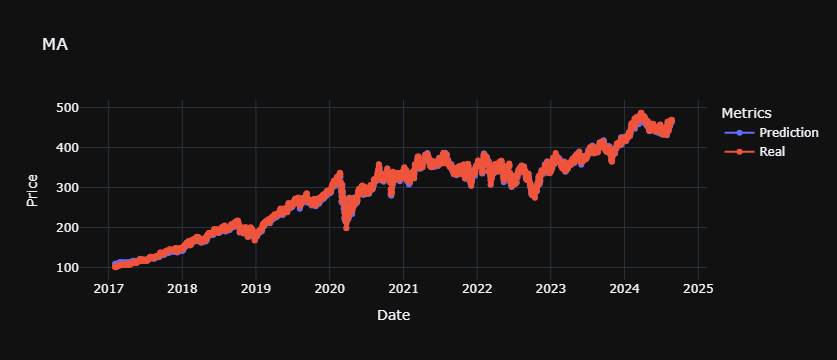

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 6.84646683e+01  6.87845982e+01  7.84815000e+05  5.31412143e-01
 -1.44094032e+01  2.39684747e+00]
Feature max [1.67384323e+02 1.67306666e+02 6.04367500e+07 1.52577443e+01
 9.25013360e+00 1.00000000e+02]
Target min [68.78459817]
Target max [167.30666553]
Predict with X shape: (1902, 20, 6)
Target min [68.78459817]
Target max [167.30666553]
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Loss: 0.5580 MAPE: 0.0048 R2: 0.9988


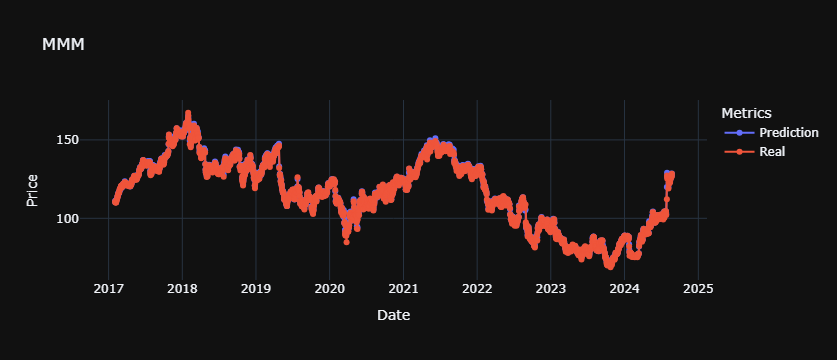

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 7.89599991e+01  7.74000015e+01  1.39900000e+05  4.10003662e-01
 -2.32099915e+01  4.70614757e+00]
Feature max [2.55929993e+02 2.56329987e+02 6.83100000e+06 2.37600098e+01
 1.91999969e+01 1.00000000e+02]
Target min [76.48999786]
Target max [256.32998657]
Predict with X shape: (1902, 20, 6)
Target min [76.48999786]
Target max [256.32998657]
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Loss: 2.1870 MAPE: 0.0078 R2: 0.9987


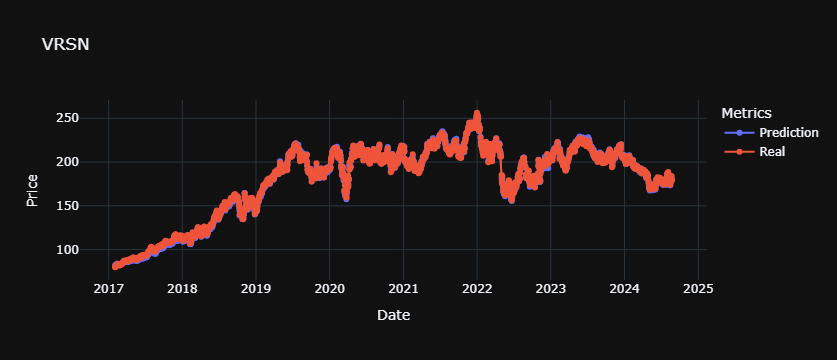

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 1.03273270e+02  1.03359144e+02  2.19500000e+05  6.57821607e-01
 -4.38739193e+01  4.44821739e+00]
Feature max [6.29575256e+02 6.30034691e+02 2.50157000e+07 4.17466241e+01
 1.73741942e+01 1.00000000e+02]
Target min [103.35914433]
Target max [630.03469105]
Predict with X shape: (1902, 20, 6)
Target min [103.35914433]
Target max [630.03469105]
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Loss: 35.3008 MAPE: 0.0311 R2: 0.9981


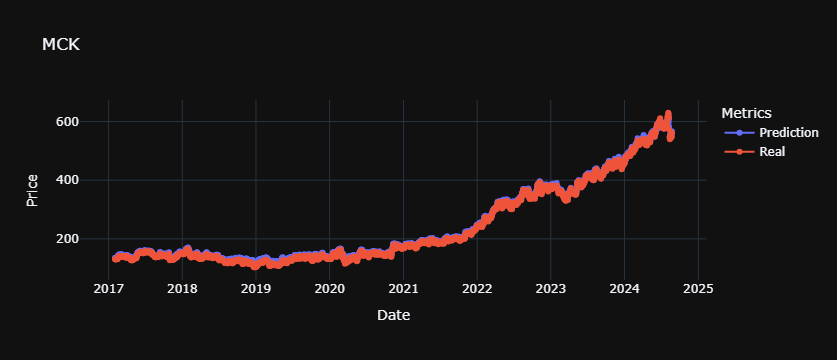

Feature columns: ['Close', 'Open', 'Volume', 'Range', 'Gap', 'RSI']
Target column: Open
Feature min [ 3.79337645e+00  3.79337645e+00  8.68400000e+05  9.98260733e-02
 -8.36539266e+00  3.51904096e+00]
Feature max [7.08782501e+01 7.07692960e+01 3.53648800e+08 1.01822223e+01
 7.45697933e+00 1.00000000e+02]
Target min [3.79337645]
Target max [70.76929598]
Predict with X shape: (1902, 20, 6)
Target min [3.79337645]
Target max [70.76929598]
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Loss: 0.2606 MAPE: 0.0292 R2: 0.9992


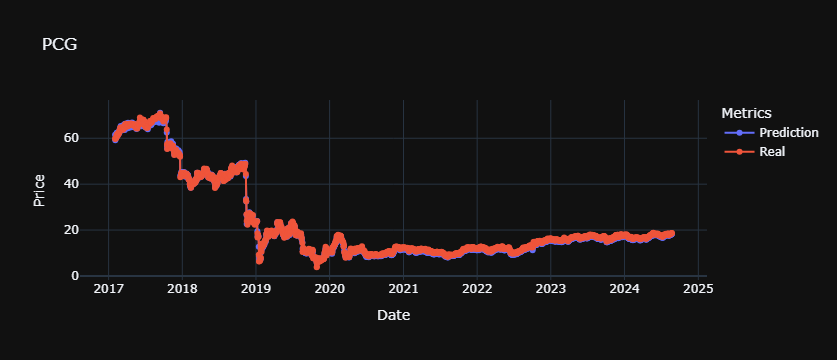

{'MA': {'loss': 9.71220809086715, 'mape': 0.010696448039994049, 'r2': 0.9990000555389772}, 'MMM': {'loss': 0.5580410101087745, 'mape': 0.00479031170221359, 'r2': 0.9988396741918187}, 'VRSN': {'loss': 2.1870090796931225, 'mape': 0.007752795933701284, 'r2': 0.9987031887309954}, 'MCK': {'loss': 35.30082808429286, 'mape': 0.03105674022871263, 'r2': 0.9981054302392628}, 'PCG': {'loss': 0.2606385973998773, 'mape': 0.029194404183632068, 'r2': 0.9992051815506859}}
{'loss': 9.603744972472356, 'mape': 0.016698140017650725, 'r2': 0.998770706050348}


In [9]:
test_tickers = [item for item in sp500_symbols if item not in nasdaq_symbols]
test_tickers = test_tickers[:5]

#tickers = ['^GSPC', '^IXIC', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'AVGO', 'META', 'GOOGL', 'GOOG', 'MMM', 'ADBE', 'BWA', 'GD', 'IT']
#tickers = ['^GSPC', '^IXIC', '^DJI']
# Test data
test_data = get_stock_data(test_tickers, "1d", start_date, end_date)

metrics_dict, mean_metrics = stock_model.evaluate_many(test_data, graph=True)
print(metrics_dict)
print(mean_metrics)
